In [1]:
import pandas as pd
import numpy as np
import math


In [6]:
pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.5 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 112 kB 45.2 MB/s 
     |████████████████████████████████| 127 kB 42.3 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=23849015ca2db8ca00bdea0e9f0416f04e0ef128d5e0a9d081410a12b706e41e
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=8e739667424b12aef76077c9880f724e41b177c3258c12042d5a9b19f6de5408
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=06eab0d98e63ea827220ba7aeba600499bc2f847d41817b0dd957

In [2]:
from datetime import date
from matplotlib import pyplot as plt
import datetime as dt
from matplotlib import dates

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
from yahoo_fin.stock_info import get_data

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

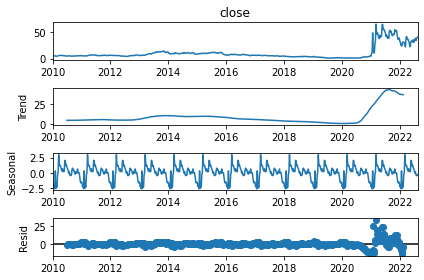

In [118]:
results = seasonal_decompose(GME_DF['close'])
results.plot();

In [117]:
GME_DF= get_data("GME", start_date="01/01/2010", end_date="08/18/2022", index_as_date = True, interval="1wk")
GME_DF

,open,high,low,close,adjclose,volume,ticker
2010-01-01,5.517500,6.025000,4.855000,5.115000,3.443930,234204800,GME
2010-01-08,5.160000,5.307500,5.027500,5.125000,3.450664,149318800,GME
2010-01-15,5.122500,5.202500,5.082500,5.105000,3.437196,74922800,GME
2010-01-22,5.105000,5.110000,4.875000,4.965000,3.342935,96035200,GME
2010-01-29,4.985000,5.142500,4.915000,5.025000,3.383333,91405600,GME
...,...,...,...,...,...,...,...
2022-07-15,34.860001,40.407501,33.507500,38.367500,38.367500,54493600,GME
2022-07-22,36.880001,38.700001,32.099998,33.840000,33.840000,28071200,GME
2022-07-29,33.680000,39.889999,33.060001,38.360001,38.360001,23476600,GME
2022-08-05,37.369999,47.990002,36.560001,39.450001,39.450001,43599100,GME


In [119]:
GME_DF.index.name = 'Date'

In [120]:
GME_DF.isna().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

In [121]:
GME_DF.describe()

,open,high,low,close,adjclose,volume
count,659.000000,659.000000,659.000000,659.000000,659.000000,6.590000e+02
mean,10.204852,11.295580,9.342128,10.174533,8.902815,9.038701e+07
std,12.360598,14.821391,10.515602,11.997648,12.268907,1.521340e+08
min,0.712500,0.965000,0.642500,0.712500,0.712500,1.660800e+07
25%,4.486250,4.673750,4.276250,4.458750,3.398642,4.378120e+07
50%,6.005000,6.250000,5.825000,6.052500,4.430282,6.272280e+07
75%,9.992500,10.340000,9.637500,10.066250,7.427229,9.153280e+07
max,94.927498,120.750000,55.357498,65.000000,65.000000,2.823330e+09


In [122]:
GME_DF = GME_DF.sort_values('Date')

In [123]:
close_prices = GME_DF['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [124]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [125]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_17 (LSTM)              (None, 100)               80400     
                                                                 
 dense_16 (Dense)            (None, 25)                2525      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=4)

Epoch 1/4
468/468 [==============================] - 20s 34ms/step - loss: 0.0018
Epoch 2/4
468/468 [==============================] - 15s 32ms/step - loss: 6.8205e-04
Epoch 3/4
468/468 [==============================] - 15s 32ms/step - loss: 4.8686e-04
Epoch 4/4
468/468 [==============================] - 15s 32ms/step - loss: 4.1236e-04


In [127]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

26.542117053401153

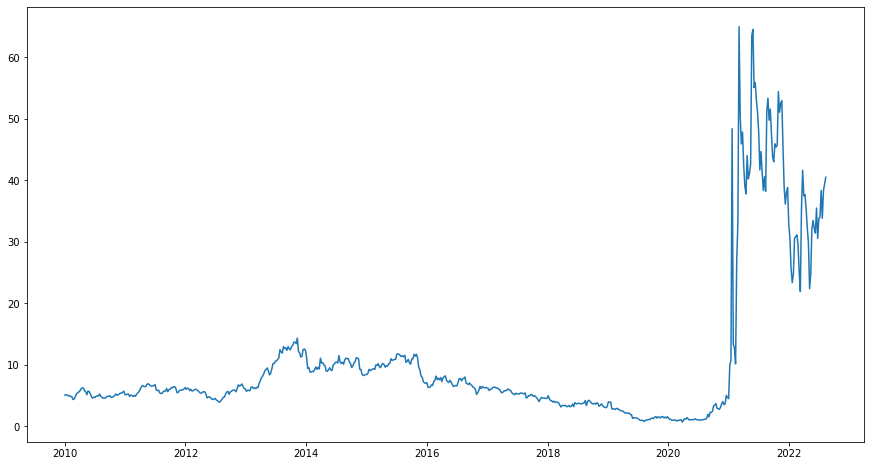

In [126]:
plt.figure(figsize=(15, 8))
plt.plot(GME_DF['close'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


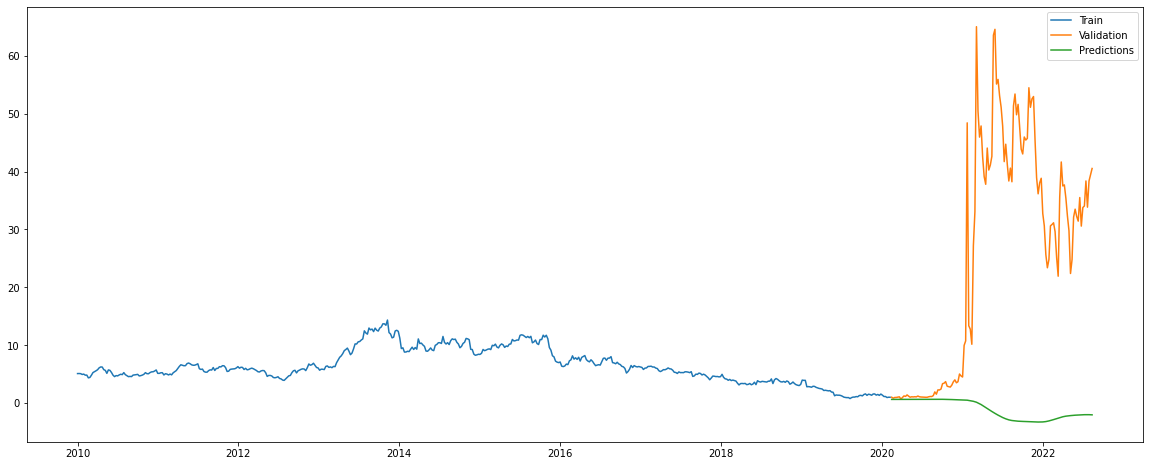

In [128]:
data = GME_DF.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])

plt.show()